In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
%matplotlib inline 

In [2]:
path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv" 
df = pd.read_csv(path)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.describe() 

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


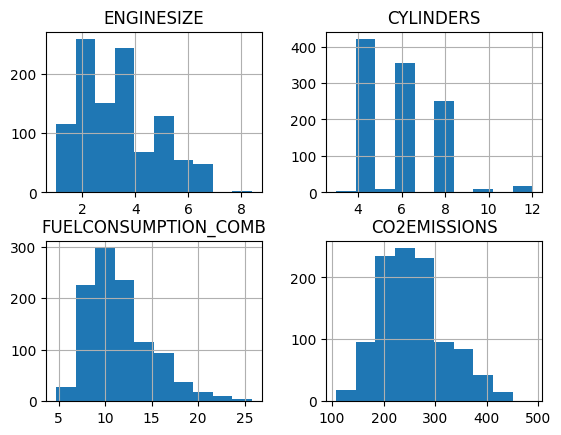

In [6]:
cdf.hist() 
plt.show()

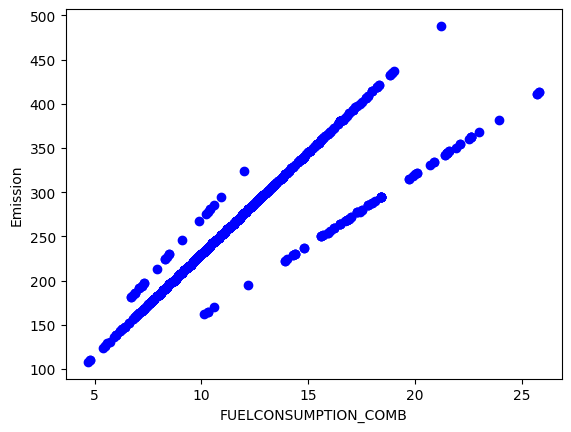

In [7]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue') 
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission") 
plt.show()

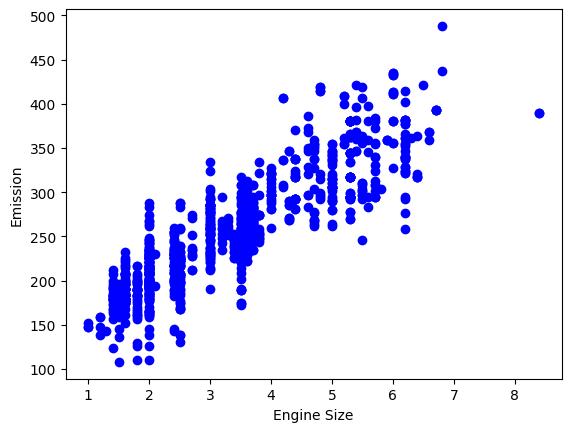

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue') 
plt.xlabel('Engine Size') 
plt.ylabel('Emission')
plt.show()

In [9]:
msk = np.random.rand(len(df)) < 0.8 
train = cdf[msk]
test = cdf[~msk] 

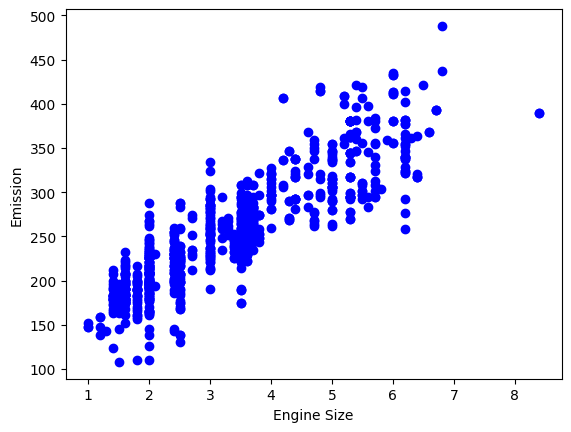

In [10]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue') 
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

In [11]:
# Modelling 
from sklearn.linear_model import LinearRegression 
model = LinearRegression() 
X_train = np.asanyarray(train[['ENGINESIZE']])
y_train = np.asanyarray(train[['CO2EMISSIONS']]) 
model.fit(X_train, y_train) 

print(f"Coefficients: {model.coef_}") 
print(f"Intercept: {model.intercept_}") 

Coefficients: [[39.28863116]]
Intercept: [124.6214967]


Text(0, 0.5, 'Emission')

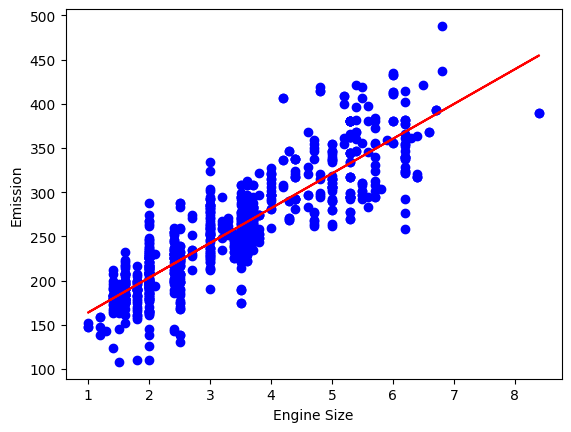

In [13]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue') 
plt.plot(X_train, model.coef_[0][0]*X_train + model.intercept_[0], '-r') 
plt.xlabel("Engine Size")
plt.ylabel("Emission")

In [14]:
from sklearn.metrics import r2_score 

X_test = np.asanyarray(test[['ENGINESIZE']])
y_test = np.asanyarray(test[['CO2EMISSIONS']]) 
y_pred = model.predict(X_test) 

print(f"Mean absolute error: {np.mean(np.absolute(y_pred - y_test))}") 
print(f"Residual sum of squares (MSE): {np.mean((y_pred - y_test) ** 2)}") 
print(f"R2-score: {r2_score(y_test, y_pred)}")

Mean absolute error: 23.064720509527568
Residual sum of squares (MSE): 949.4496646605592
R2-score: 0.73926545586644


In [23]:
# Using FuelConsumption 
X_train = np.asanyarray(train[['FUELCONSUMPTION_COMB']])  
y_train = np.asanyarray(train[['CO2EMISSIONS']])
X_test = np.asanyarray(test[['FUELCONSUMPTION_COMB']]) 

In [24]:
model = LinearRegression() 
model.fit(X_train, y_train) 
y_pred = model.predict(X_test) 

print(f"Mean absolute error: {np.mean(np.absolute(y_pred - y_test))}") 
print(f"Residual sum of squares (MSE): {np.mean((y_pred - y_test) ** 2)}") 
print(f"R2-score: {r2_score(y_test, y_pred)}")

Mean absolute error: 21.159485378708407
Residual sum of squares (MSE): 912.4225500133291
R2-score: 0.7494337125075943
